In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## ODE System Example: Branched Pathway

Let's simulate the ODE system from https://jjj.bio.vu.nl/models/branch5/simulate/

In [5]:
def systemODE(h,t):
    
    S = 10.0 # Assumed fixed (constant)
    P1 = 1.0 # Assumed fixed (constant)
    P2 = 1.0 # Assumed fixed (constant)
    X1 = h[0]
    X2 = h[1]
    X3 = h[2]
    
    K = 1.0
    Keq = 1.0
    V1 = 1.0
    V2 = 1.0
    V3 = 1.0
    V4 = 1.0
    V5 = 1.0
    
    v1 = S*V1*(1-X1/(Keq*S))/(K*(1+S/K+X1/K))
    v2 = X1*V1*(1-X3/(Keq*X1))/(K*(1+X1/K+X3/K))
    v3 = X1*V3*(1-X2/(Keq*X1))/(K*(1+X1/K+X2/K))
    v4 = X1*V4*(1-P1/(Keq*X2))/(K*(1+P1/K+X2/K))
    v5 = X1*V5*(1-P2/(Keq*X3))/(K*(1+P2/K+X3/K))
    
    dX1dt = v1-v2-v3
    dX2dt = v3-v4
    dX3dt = v2-v5
    
    # Finally, return the differentials as an array as well!
    dhdt = [dX1dt,dX2dt,dX3dt]
    return dhdt

In [4]:
t_array = np.linspace(0,10,11)
print(t_array)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [6]:
h0 = [1.0,1.0,1.0]

In [7]:
output = scipy.integrate.odeint(systemODE, h0, t_array)

In [8]:
output

array([[1.        , 1.        , 1.        ],
       [1.54658466, 1.06859521, 1.06859521],
       [1.88214123, 1.16708358, 1.16708358],
       [2.11874864, 1.24782049, 1.24782049],
       [2.29381358, 1.30789338, 1.30789338],
       [2.42568269, 1.35137936, 1.35137936],
       [2.52565008, 1.38257931, 1.38257931],
       [2.60154365, 1.4049122 , 1.4049122 ],
       [2.65911493, 1.42090676, 1.42090676],
       [2.70270814, 1.43238518, 1.43238518],
       [2.73564413, 1.44064628, 1.44064628]])

Let's plot the output:

Text(0, 0.5, 'Amount')

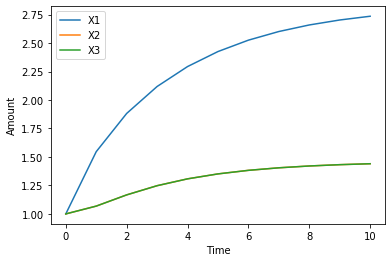

In [9]:
plt.plot(t_array,output[:,0],label='X1')
plt.plot(t_array,output[:,1],label='X2')
plt.plot(t_array,output[:,2],label='X3')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amount')